<a href="https://colab.research.google.com/github/nusc2016/Pima-Indians/blob/master/Aaron_Huizenga_Unit2_Build_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The Dataset that I am using is originally from the National Institute of Diabetes and Digestive & Kidney Diseases. The sole objective of the project is to diagnostically predict whether or not a patient is at risk of being diagnosed a diabetic based on the number of pregnancies, which is based on certain measurements that are included in the dataset.

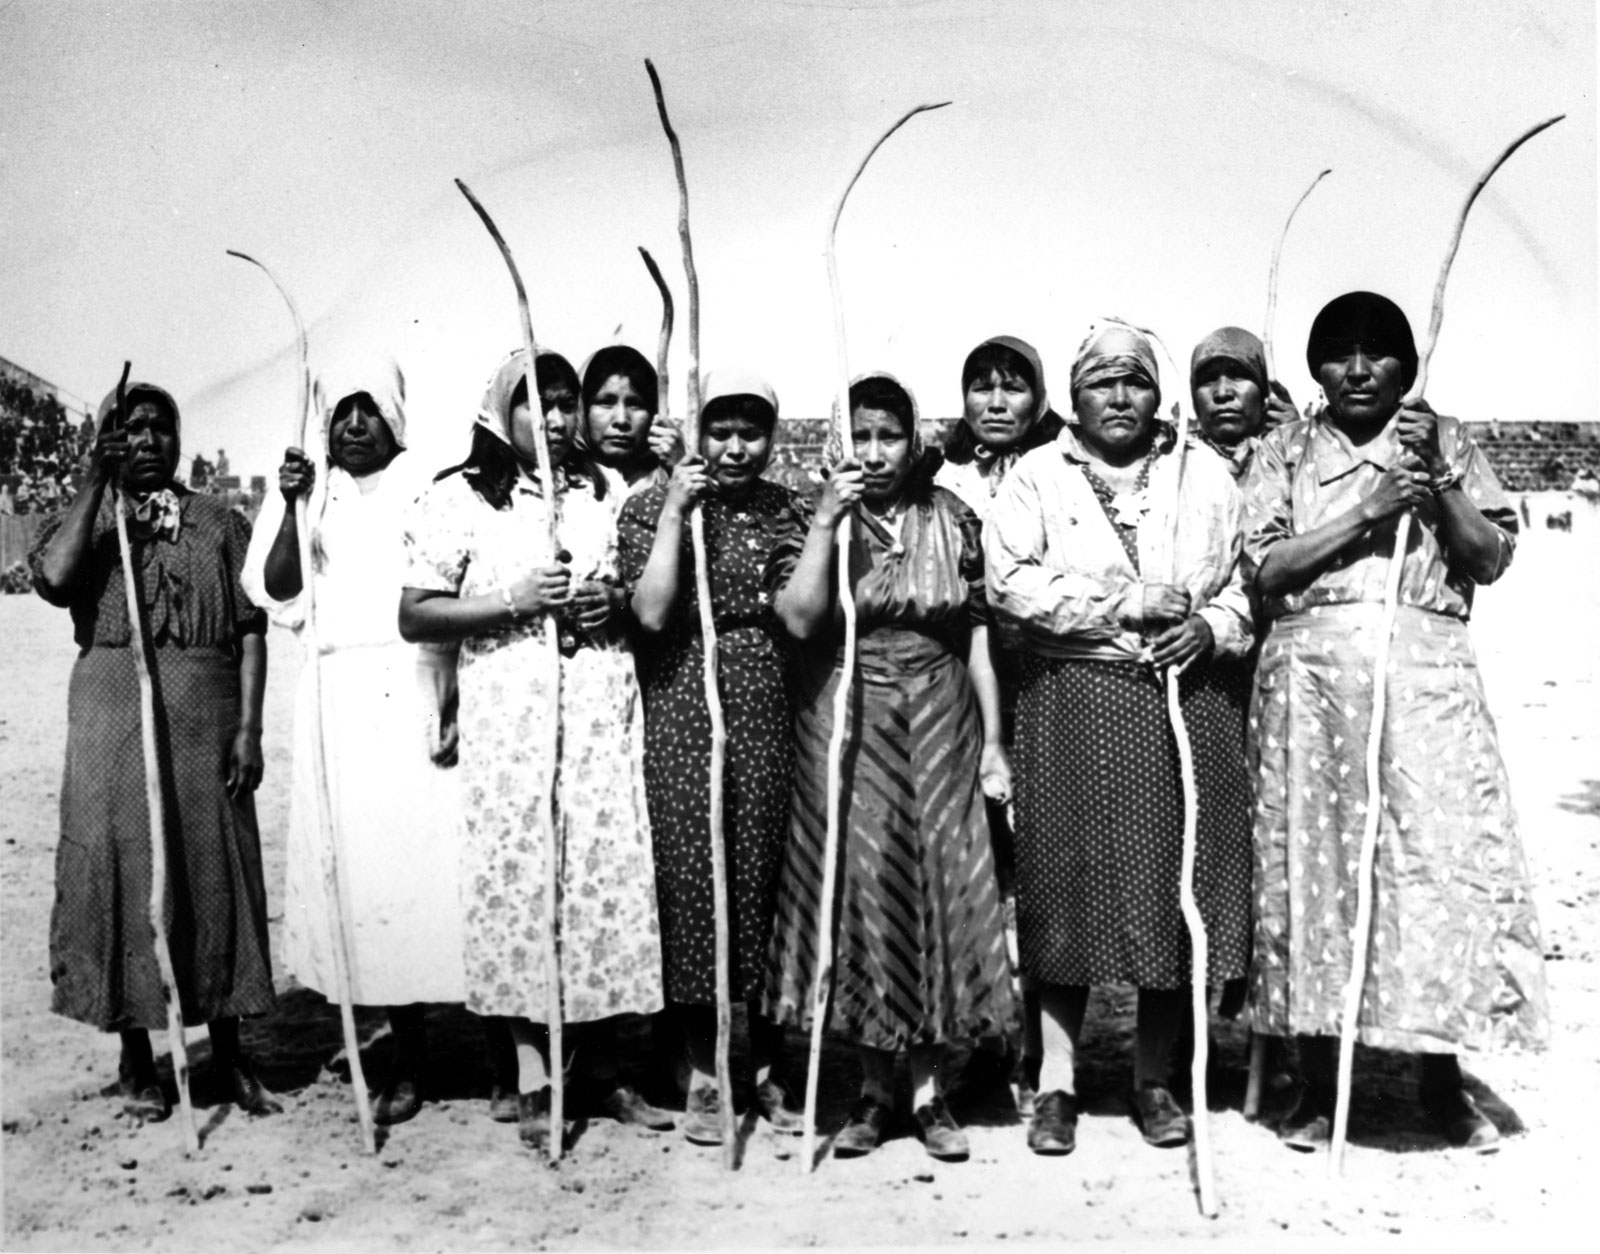

In [0]:
from IPython.display import display, Image
png = 'https://cdn.britannica.com/42/93542-050-E2B32DAB/women-Pima-shinny-game-field-hockey.jpg'
example = Image(png, width=750)
display(example)

In [0]:
# To start I need to make sure that I have the proper libraries needed to read 
# the dataset so that I can make the proper changes if need be. Once I have 
# finished then I can begin exploring.

%%capture
import sys

if 'google.colab' in sys.modules:
  # Install packages in Colab
  !pip install -q matplotlib-venn
  !pip install category_encoders==2.*
  !pip install pandas-profiling==2.*
  !pip install shap
  !pip install eli5
  !pip install pdpbox

In [0]:
from google.colab import files
files.upload()

Saving diabetic.csv to diabetic (3).csv


{'diabetic.csv': b'Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome\r\n6,148,72,35,0,33.6,0.627,50,1\r\n1,85,66,29,0,26.6,0.351,31,0\r\n8,183,64,0,0,23.3,0.672,32,1\r\n1,89,66,23,94,28.1,0.167,21,0\r\n0,137,40,35,168,43.1,2.288,33,1\r\n5,116,74,0,0,25.6,0.201,30,0\r\n3,78,50,32,88,31,0.248,26,1\r\n10,115,0,0,0,35.3,0.134,29,0\r\n2,197,70,45,543,30.5,0.158,53,1\r\n8,125,96,0,0,0,0.232,54,1\r\n4,110,92,0,0,37.6,0.191,30,0\r\n10,168,74,0,0,38,0.537,34,1\r\n10,139,80,0,0,27.1,1.441,57,0\r\n1,189,60,23,846,30.1,0.398,59,1\r\n5,166,72,19,175,25.8,0.587,51,1\r\n7,100,0,0,0,30,0.484,32,1\r\n0,118,84,47,230,45.8,0.551,31,1\r\n7,107,74,0,0,29.6,0.254,31,1\r\n1,103,30,38,83,43.3,0.183,33,0\r\n1,115,70,30,96,34.6,0.529,32,1\r\n3,126,88,41,235,39.3,0.704,27,0\r\n8,99,84,0,0,35.4,0.388,50,0\r\n7,196,90,0,0,39.8,0.451,41,1\r\n9,119,80,35,0,29,0.263,29,1\r\n11,143,94,33,146,36.6,0.254,51,1\r\n10,125,70,26,115,31.1,0.205,41,1\r\n7,147,76,0,0,39.4,0.257,43

In [0]:
# I want to start by importing some basic libraries that I will need for the 
# foreseeable future. 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

# I have already loaded the file, now I just need to import it.

df = pd.read_csv('diabetic.csv')
df.head()

Pregnancies  Glucose  BloodPressure  ...  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72  ...                     0.627   50        1
1            1       85             66  ...                     0.351   31        0
2            8      183             64  ...                     0.672   32        1
3            1       89             66  ...                     0.167   21        0
4            0      137             40  ...                     2.288   33        1

[5 rows x 9 columns]

In [0]:
# The 'describe' function is a simple function, but can also be left out when you 
# need it most. This will allow me to see what each column and its values hold.

df.describe().T

count        mean  ...        75%     max
Pregnancies               768.0    3.845052  ...    6.00000   17.00
Glucose                   768.0  120.894531  ...  140.25000  199.00
BloodPressure             768.0   69.105469  ...   80.00000  122.00
SkinThickness             768.0   20.536458  ...   32.00000   99.00
Insulin                   768.0   79.799479  ...  127.25000  846.00
BMI                       768.0   31.992578  ...   36.60000   67.10
DiabetesPedigreeFunction  768.0    0.471876  ...    0.62625    2.42
Age                       768.0   33.240885  ...   41.00000   81.00
Outcome                   768.0    0.348958  ...    1.00000    1.00

[9 rows x 8 columns]

In [0]:
# The 'dtypes' function will return the types of each column, so that if I need 
# to make changes to one, then I know where I need to go. 

df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [0]:
# Since I have worked with the data all week previous to the build week, I know 
# that there are no missing values; however, during this week I want to make sure
# that there's no leakage within the data. So for starters, I will work with 
# changing the names of each column. 

df.rename(columns={'Pregnancies':'PREGNANCIES'}, inplace=True)
df.rename(columns={'Glucose':'GLUCOSE'}, inplace=True)
df.rename(columns={'BloodPressure':'BP'}, inplace=True)
df.rename(columns={'SkinThickness':'SKIN-THICKNESS'}, inplace=True)
df.rename(columns={'Insulin':'INSULIN'}, inplace=True)
df.rename(columns={'DiabetesPedigreeFunction':'DPF'}, inplace=True)
df.rename(columns={'Age':'AGE'}, inplace=True)
df.rename(columns={'Outcome':'OUTCOME'}, inplace=True)

print(df.shape)
df.head()

(768, 9)


PREGNANCIES  GLUCOSE  BP  SKIN-THICKNESS  INSULIN   BMI    DPF  AGE  OUTCOME
0            6      148  72              35        0  33.6  0.627   50        1
1            1       85  66              29        0  26.6  0.351   31        0
2            8      183  64               0        0  23.3  0.672   32        1
3            1       89  66              23       94  28.1  0.167   21        0
4            0      137  40              35      168  43.1  2.288   33        1

## Pandas profiling is a more than just an efficient way to get an overall in-depth view into the dataset and the variables that lay within. The draw back is having to use caution if the dataset is too big, as it can be time consuming. Since the dataset that I am working with only has 768 observations and 9 columns, I have decided to use this function.

In [0]:
import pandas_profiling
pandas_profiling.ProfileReport(df)

### The following is a representation of the data set. It shows the percentage of women who are actually classified as being diabetic. As we move further into exploring the data, we will find out just how this is determined. 

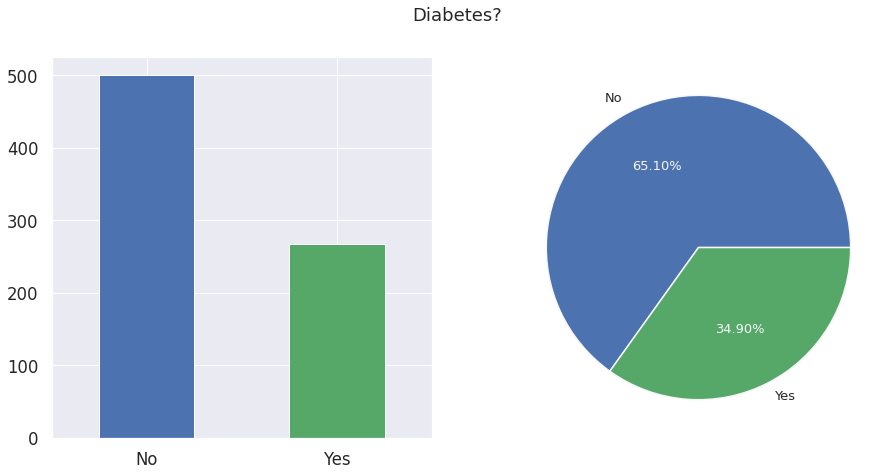

In [0]:
f, ax = plt.subplots(1, 2, figsize = (15, 7))
f.suptitle("Diabetes?", fontsize = 18.)
_ = df.OUTCOME.value_counts().plot.bar(ax = ax[0], rot = 0, color = (sns.color_palette()[0], sns.color_palette()[2])).set(xticklabels = ["No", "Yes"])
_ = df.OUTCOME.value_counts().plot.pie(labels = ("No", "Yes"), autopct = "%.2f%%", label = "", fontsize = 13., ax = ax[1],\
colors = (sns.color_palette()[0], sns.color_palette()[2]), wedgeprops = {"linewidth": 1.5, "edgecolor": "#F7F7F7"}), ax[1].texts[1].set_color("#F7F7F7"), ax[1].texts[3].set_color("#F7F7F7")

### A Violin plot is just one of a handful of ways in plotting numeric data. It is similar to box plots with a rotated kernel density plot on each side, except that they also show the probability of that data at different values. 
  * The violin plot is more informative than a simple & plain box plot. It shows the full distribution of the data. The inner part of a violin plot usually shows the mean (aka-median) and the interquartile range. 

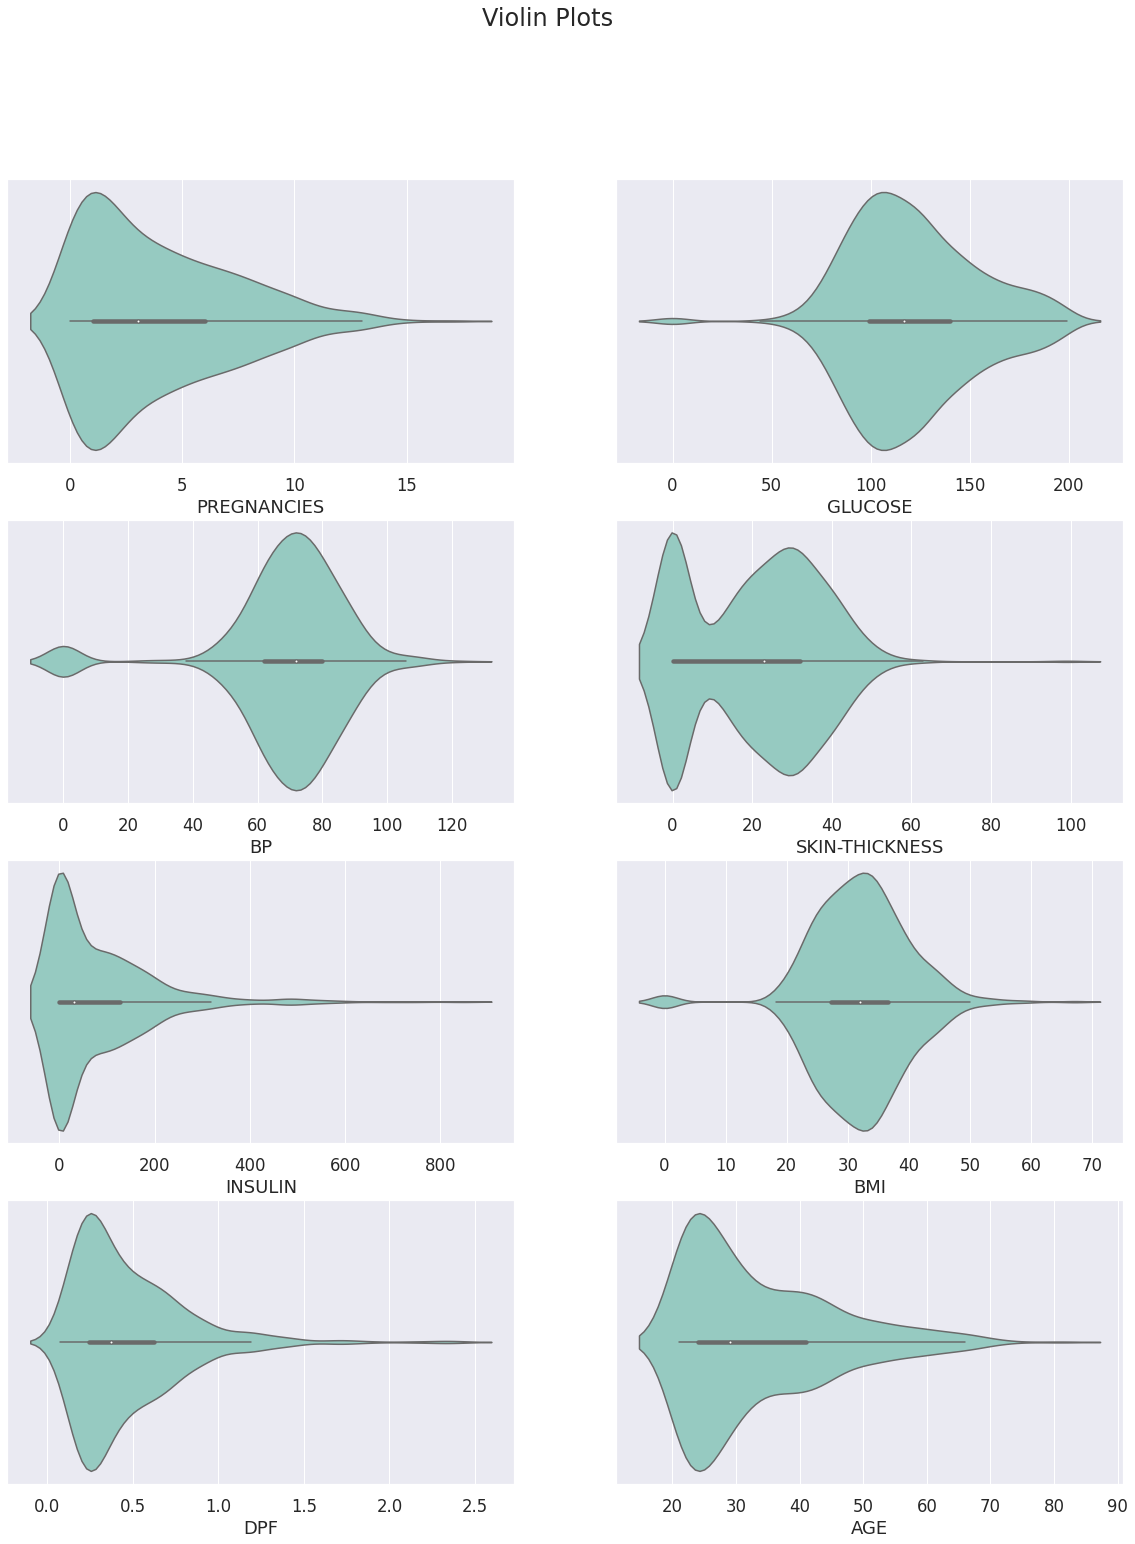

In [0]:
fig,ax = plt.subplots(nrows=4, ncols=2, figsize=(20,24))
plt.suptitle('Violin Plots',fontsize=24)
sns.violinplot(x="PREGNANCIES", data=df,ax=ax[0,0],palette='Set3')
sns.violinplot(x="GLUCOSE", data=df,ax=ax[0,1],palette='Set3')
sns.violinplot (x='BP', data=df, ax=ax[1,0], palette='Set3')
sns.violinplot(x='SKIN-THICKNESS', data=df, ax=ax[1,1], palette='Set3')
sns.violinplot(x='INSULIN', data=df, ax=ax[2,0], palette='Set3')
sns.violinplot(x='BMI', data=df, ax=ax[2,1],palette='Set3')
sns.violinplot(x='DPF', data=df, ax=ax[3,0],palette='Set3')
sns.violinplot(x='AGE', data=df, ax=ax[3,1],palette='Set3')
plt.show()

### One last visual before diving into the dataset. The following would be a correlation matrix. A correlation could be positive, meaning both variables move in the same direction, or negative, meaning that when one variable’s value increases, the other variables’ values decrease. Correlation can also be neural or zero, meaning that the variables are unrelated.

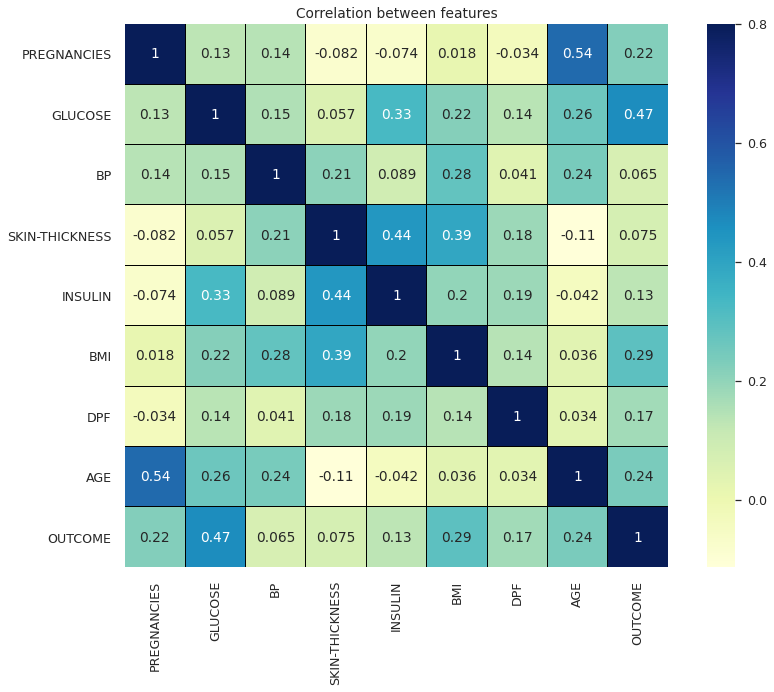

In [0]:
corr=df.corr()

sns.set(font_scale=1.15)
plt.figure(figsize=(14, 10))

sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="black")
plt.title('Correlation between features');

# 1. EDA (Explanatory Data Analysis)

In [0]:
# I would like to remove any unusual rows within the dataset.

df_mod = df[(df.BP !=0) & (df.BMI !=0) & (df.GLUCOSE !=0)]

# This will print a new dataset after cleaning it.

print(df_mod.shape)

(724, 9)


In [0]:
# Next I would like to introduce some standardization needing to be done on the 
# dataset. The following code should do just that. 

scl = StandardScaler()
X = scl.fit_transform(X)
print(X[:5, :])

[[ 0.63502182  0.84993279  0.16456174  0.45842062]
 [-0.85286102 -1.20026207 -0.85226209 -0.37269083]
 [ 1.23017496  1.98892994 -1.33162189  0.59392792]
 [-0.85286102 -1.07009096 -0.63437127 -0.92676513]
 [-1.15043759  0.49196226  1.54453693  5.46014571]]


In [0]:
# The following will split the features(X) and target(y) into 70% to train the 
# model and 30% to test the model.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

print("70% Features Training Data : ", X_train.shape)
print("30% Features Testing Data : ", X_test.shape)
print("70% Target Training Data : ", y_train.shape)
print("30% Target Testing Data : ", y_test.shape)

70% Features Training Data :  (506, 4)
30% Features Testing Data :  (218, 4)
70% Target Training Data :  (506,)
30% Target Testing Data :  (218,)


### This next cell will be my feature selection

In [0]:
feature_names = ['PREGNANCIES', 'GLUCOSE', 'BMI', 'DPF']
X = df_mod[feature_names]
y = df_mod.OUTCOME

# 2. Model Selection

In [0]:
logreg = LogisticRegression(C=1, multi_class='ovr', penalty='l2', solver='liblinear')

In [0]:
# Now that we have selected our first model (LR) we can now set it up for the 
# train/test split. 

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 0)

logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy {}".format(accuracy))

Accuracy 0.7955801104972375


In [0]:
# Now to make class prediction on the test data.

y_pred = logreg.predict(X_test)

In [0]:
# This will check the predict shape

y_pred.shape

(181,)

### I am going to switch it up and go with K-Fold Cross Validation

In [0]:
accuracy = cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean()

print("Accuracy {}".format(accuracy))

Accuracy 0.7790525114155251


In [0]:
# The following will check for the accuracy score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy Score : ", accuracy_score(y_test, y_pred), "\n")
print("Classification Report :\n", classification_report(y_test, y_pred), "\n")
print("Confusion Matrix :\n", confusion_matrix(y_test, y_pred))

Accuracy Score :  0.7955801104972375 

Classification Report :
               precision    recall  f1-score   support

           0       0.81      0.91      0.85       119
           1       0.77      0.58      0.66        62

    accuracy                           0.80       181
   macro avg       0.79      0.74      0.76       181
weighted avg       0.79      0.80      0.79       181
 

Confusion Matrix :
 [[108  11]
 [ 26  36]]


In [0]:
y_pred_prob = logreg.predict_proba(X_test)
print(y_pred_prob[:5,:])

[[0.80085377 0.19914623]
 [0.70450063 0.29549937]
 [0.81765257 0.18234743]
 [0.45582948 0.54417052]
 [0.32622925 0.67377075]]


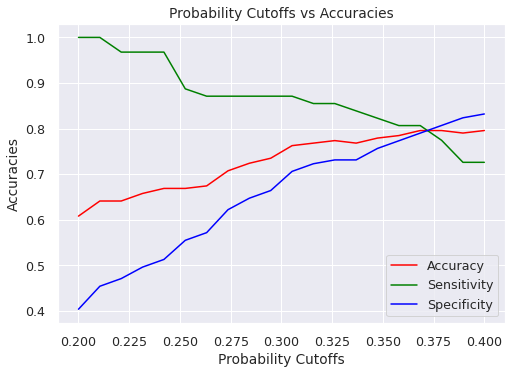

In [0]:
# The purpose for this Cut-off is that it respresents the probability that my 
# prediction is true.

p_cutoff = np.linspace(0.20,0.40,20)
acc = []
sen = []
spe = []

for pc in p_cutoff:
    y_test_pred = [1 if y>pc else 0 for y in y_pred_prob[:,1]]
    tn, fp, fn, tp = confusion_matrix(y_test,y_test_pred).ravel()
    acc.append(accuracy_score(y_test,y_test_pred))
    sen.append(tp/(tp+fn))
    spe.append(tn/(tn+fp))

plt.plot(p_cutoff, acc, color='red', label="Accuracy")
plt.plot(p_cutoff, sen, color='green', label="Sensitivity")
plt.plot(p_cutoff, spe, color='blue', label="Specificity")
plt.xlabel("Probability Cutoffs")
plt.ylabel("Accuracies")
plt.title("Probability Cutoffs vs Accuracies")
plt.legend(loc=4)
plt.show()

## Next I want to plot a Confusion Matrix

In [0]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [0]:
# It was shown previously in checking for the accuracy score, but I will need this
# in order to plot it correctly.

confusion = confusion_matrix(y_test, y_pred)
print(confusion)

[[108  11]
 [ 26  36]]


Confusion matrix, without normalization
[[108  11]
 [ 26  36]]


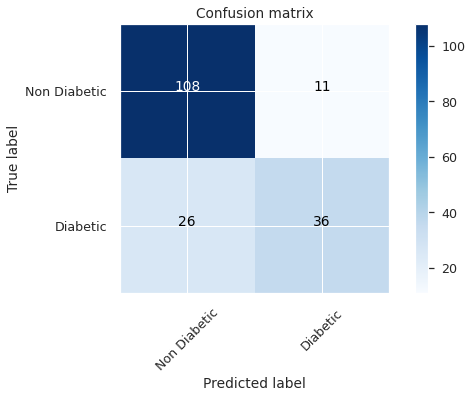

In [0]:
# If you are designated 0 you are a non-diabetic where 1 designates you a diabetic.
import itertools

plot_confusion_matrix(confusion, classes=['Non Diabetic', 'Diabetic'], title='Confusion matrix');

## Next up I will input the metrics from the confusion matrix. Included will be 'Classification Accuracy', 'Recall', 'Specificity', 'False-Positive Rate' & 'Precision'.

In [0]:
# I used this in a previous assignment, but I thought it imperative that I include
# it in the project as well.
from sklearn.metrics import recall_score, precision_score

In [0]:
# Start off by defining certain functions that I will need.

# True Positive
TP = confusion[1, 1]

# True Negatives
TN = confusion[0, 0]

# False Positive
FP = confusion[0, 1]

# False Negative
FN = confusion[1, 0]

In [0]:
# I will start off with Classification Accuracy.

print((TP + TN) / float(TP + TN + FP +FN))
print(accuracy_score(y_test, y_pred))

0.7955801104972375
0.7955801104972375


In [0]:
# Next will be Recall

print(TP / float(TP + FN))
print(recall_score(y_test, y_pred))

0.5806451612903226
0.5806451612903226


In [0]:
# Next will be specificity

print(TN / float(TN +FP))

0.907563025210084


In [0]:
# Next will be False Positive Rate

print(FP / float(TN + FP))

0.09243697478991597


In [0]:
# Lastly I will calculate Precision

print(TP / float(TP + FP))
print(precision_score(y_test, y_pred))

0.7659574468085106
0.7659574468085106


## Taking it a step further, I want to calculate the TPR and the FPR and eventually plot the difference using the ROC accuracy and curve.

### In a ROC curve the true positive rate (Sensitivity) is plotted in function of the false positive rate (100-Specificity) for different cut-off points of a parameter. ... The area under the ROC curve ( AUC ) is a measure of how well a parameter can distinguish between two diagnostic groups (diseased/normal).

In [0]:
from sklearn.metrics import roc_auc_score, roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])
print("False Positive Rate (FPR) :\n", fpr.shape, "\n")
print("True Positive Rate (TPR) :\n", tpr.shape, "\n")
print("Threshold Values :\n\n", thresholds)

False Positive Rate (FPR) :
 (62,) 

True Positive Rate (TPR) :
 (62,) 

Threshold Values :

 [1.94110857 0.94110857 0.87308996 0.87109357 0.77493453 0.74247768
 0.71326527 0.712856   0.69358741 0.67377075 0.64808321 0.64704309
 0.6382392  0.63580342 0.6027458  0.5997264  0.5982045  0.59160499
 0.56775007 0.55003967 0.5377017  0.52338002 0.50162331 0.49551188
 0.4919069  0.48108705 0.47676375 0.47061663 0.46170705 0.44223239
 0.41850214 0.40738575 0.40230935 0.39404616 0.38649201 0.38487785
 0.38323265 0.37857178 0.37169327 0.37144885 0.3707388  0.35561517
 0.34589989 0.33884862 0.33199714 0.30877612 0.30742568 0.26463618
 0.25510556 0.25230787 0.2510918  0.24938617 0.24762101 0.24682561
 0.24341196 0.2429454  0.24294403 0.22298549 0.21874344 0.21661192
 0.21623031 0.06136381]


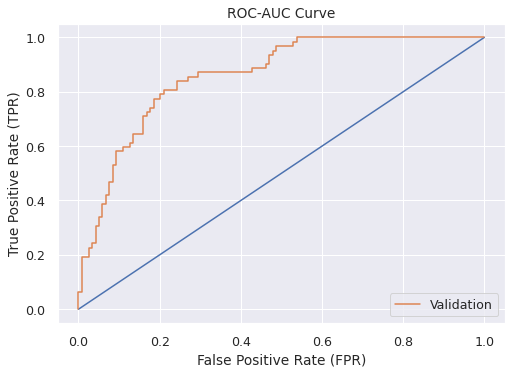

In [0]:
# This will give you a visualization of the two rates

plt.plot([0,1],[0,1])
plt.plot(fpr,tpr,label="Validation")
plt.legend(loc=4)
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC-AUC Curve");

In [0]:
# The following function will calculate the area under the curve

AUC_Score = roc_auc_score(y_test, y_pred_prob[:,1])
print("AUC Score : ", AUC_Score)

AUC Score :  0.8587693141772839


In [0]:
# One final point that I would like to plot(graph) would be the OUTCOME vs.
# Pregnancies. How the number of said Pregnancies has an affect on "OUTCOME".

# First I would like to create a crosstab

pd.crosstab(df['OUTCOME'], df['PREGNANCIES']).style.background_gradient(cmap='Blues_r')

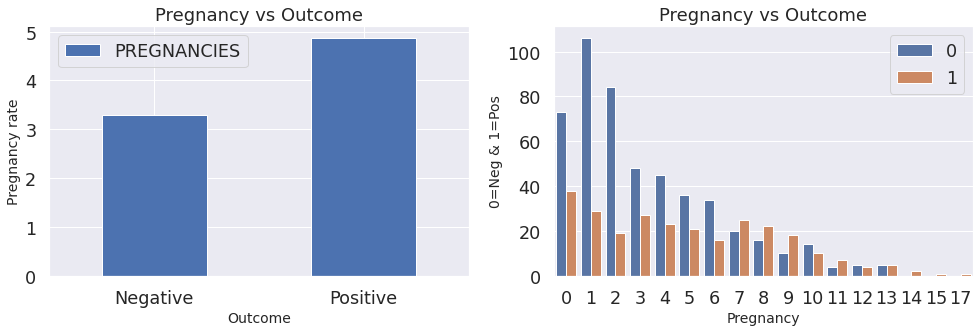

In [0]:
sns.set(font_scale=1.6) 
f,ax=plt.subplots(1, 2, figsize=(14,5))
df.groupby('OUTCOME').agg({'PREGNANCIES':'mean'}).plot.bar(ax=ax[0])
ax[0].set_title('Pregnancy vs Outcome', size=18)
ax[0].set_ylabel('Pregnancy rate', size=14)
ax[0].set_xlabel('Outcome', size=14)
xticklabels = ['Negative', 'Positive']
ax[0].set_xticklabels(xticklabels, rotation = 0)

sns.countplot('PREGNANCIES',hue='OUTCOME',data=df, ax=ax[1])
ax[1].set_title('Pregnancy vs Outcome', size=18)
ax[1].set_xlabel('Pregnancy', size=14)
ax[1].set_ylabel('0=Neg & 1=Pos', size=14)
ax[1].legend(loc='upper right')
plt.tight_layout()   
plt.show()
f.savefig('test_rotation.png', dpi=200, format='png', bbox_inches='tight')
plt.style.use('classic')

## I want to use the KNN(K-Nearest Neighbors) Model.

In [0]:
# I will start with importing and creating the object of the LR model.

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

# Now I need to fit the model

knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [0]:
# Next I will make class predicts on train and test data while checking shapes. 

y_train_pred_knn = knn.predict(X_train)
y_test_pred_knn = knn.predict(X_test)
print(y_train_pred_knn.shape)
print(y_test_pred_knn.shape)

(543,)
(181,)


In [0]:
# Using a 10 fold I will calculate the model's accuracy
# function
from sklearn.model_selection import KFold

folds = KFold(n_splits=5, shuffle=False, random_state=None)
CrossValScoreKnn = cross_val_score(estimator=knn, X=X_train, y=y_train, cv=folds, verbose=1)
print("Cross Validation Score of 5 folds : ", CrossValScoreKnn, "\n")
print("Average Cross Validation Score 5 folds : ", np.mean(CrossValScoreKnn))

Cross Validation Score of 5 folds :  [0.69724771 0.6146789  0.57798165 0.66666667 0.71296296] 

Average Cross Validation Score 5 folds :  0.6539075773020726


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


In [0]:
# The following function will calculate the KNN score, Accuracy Score
# and the classification report. 

print("Training KNN Score for K=1 : ", knn.score(X_train, y_train), "\n")
print("Training Accuracy Score for K=1 : ", accuracy_score(y_train, y_train_pred_knn), "\n")
print("Training Classification Report for K=1 :\n", classification_report(y_train, y_train_pred_knn), "\n")
print("_"*100)
print("Training KNN Score for K=1 : ", knn.score(X_test, y_test), "\n")
print("Testing Accuracy Score for K=1 : ", accuracy_score(y_test, y_test_pred_knn), "\n")
print("Testing Classification Report K=1 :\n", classification_report(y_test, y_test_pred_knn), "\n")

Training KNN Score for K=1 :  1.0 

Training Accuracy Score for K=1 :  1.0 

Training Classification Report for K=1 :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       356
           1       1.00      1.00      1.00       187

    accuracy                           1.00       543
   macro avg       1.00      1.00      1.00       543
weighted avg       1.00      1.00      1.00       543
 

____________________________________________________________________________________________________
Training KNN Score for K=1 :  0.6629834254143646 

Testing Accuracy Score for K=1 :  0.6629834254143646 

Testing Classification Report K=1 :
               precision    recall  f1-score   support

           0       0.75      0.73      0.74       119
           1       0.51      0.53      0.52        62

    accuracy                           0.66       181
   macro avg       0.63      0.63      0.63       181
weighted avg       0.67      0.66   

In [0]:
# This cell will tune the KNN model from 1 to 15 in order to get the best value 
# of K.

neighbors = np.arange(1,15)
training_accuracy = np.empty(len(neighbors))
testing_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    training_accuracy[i] = knn.score(X_train, y_train)
    testing_accuracy[i] = knn.score(X_test, y_test)

print(neighbors)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14]


In [0]:
print("Training KNN for K=1 to 15 :", training_accuracy.shape, "\n")
print("Testing KNN for K=1 to 15 : ", testing_accuracy.shape, "\n")

Training KNN for K=1 to 15 : (14,) 

Testing KNN for K=1 to 15 :  (14,) 



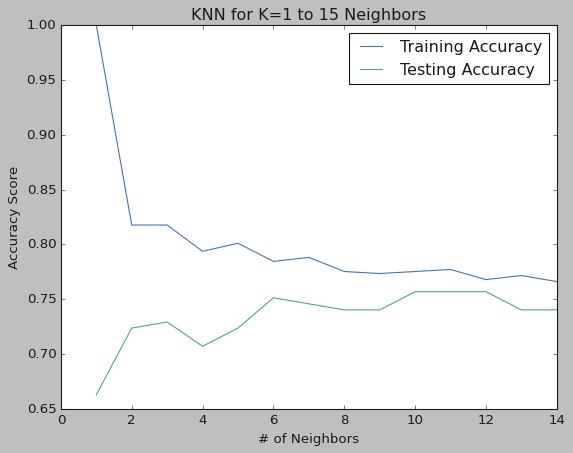

In [0]:
# Finally a visualization of K=1 to 15

plt.plot(neighbors, training_accuracy, label="Training Accuracy")
plt.plot(neighbors, testing_accuracy, label="Testing Accuracy")
plt.legend(loc=0)
plt.xlabel("# of Neighbors")
plt.ylabel("Accuracy Score")
plt.title("KNN for K=1 to 15 Neighbors")
plt.show()

In [0]:
# In this visualization it appears that the best value of K is 11. This is due 
# in part because the difference between Test and Train accuracy is less and the 
# accuracy appears to be less as it continues. So what I'll do here is fit the 
# model for K=11

tuned_knn = KNeighborsClassifier(n_neighbors=11)
tuned_knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

In [0]:
# Now I will calculate the CVS, Train and Test scores for K=11

folds = KFold(n_splits=5, shuffle=False, random_state=None)
CrossValScore_knn = cross_val_score(estimator=tuned_knn, X=X_train, y=y_train, cv=folds, verbose=1)
print("Cross Validarion Score of 5 folds for K=11 : ", CrossValScore_knn, "\n")

print("Average Cross Validarion Score for K=11 : ", np.mean(CrossValScore_knn), "\n")

print("Training KNN Score for K=11 : ", tuned_knn.score(X_train, y_train), "\n")

print("Testing KNN Score for K=11 : ", tuned_knn.score(X_test, y_test), "\n")

Cross Validarion Score of 5 folds for K=11 :  [0.73394495 0.69724771 0.67889908 0.75925926 0.83333333] 

Average Cross Validarion Score for K=11 :  0.7405368671423719 

Training KNN Score for K=11 :  0.7771639042357275 

Testing KNN Score for K=11 :  0.7569060773480663 



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


# I would like to conclude this project by tuning my paramaters. 

In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
# Specify parameters
c_values = list(np.arange(1, 10))

param_grid = [
    {'C': c_values, 'penalty': ['l1'], 'solver' : ['liblinear'], 'multi_class' : ['ovr']},
    {'C': c_values, 'penalty': ['l2'], 'solver' : ['liblinear', 'newton-cg', 'lbfgs'], 'multi_class' : ['ovr']}
]

In [0]:
grid = GridSearchCV(LogisticRegression(), param_grid, cv=strat_k_fold, scoring='accuracy', iid=False)
grid.fit(X_new, y)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid=False, n_jobs=None,
             param_grid=[{'C': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                          'multi_class': ['ovr'], 'penalty': ['l1'],
                          'solver': ['liblinear']},
                         {'C': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                          'multi_class': ['o

In [0]:
print(grid.best_params_)
print(grid.best_estimator_)

{'C': 1, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'liblinear'}
LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


In [0]:
logreg_new = LogisticRegression(C=1, multi_class='ovr', penalty='l2', solver='liblinear')

In [0]:
initial_score = cross_val_score(logreg_new, X_new, y, cv=strat_k_fold, scoring='accuracy').mean()
print("Final accuracy : {} ".format(initial_score))

Final accuracy : 0.7790525114155251 


## In conclusion, with the data shown and the models used to predict, as a woman you would be at a greater risk of being diagnosed as a diabetic with having multiple pregnancies. 